## Author : Rahul Suresh

In [1]:
from utils import *

from imblearn.over_sampling import ADASYN

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv('../../data/previous_gp/processed_cases.csv')

In [3]:
df

,Status Closed,Status Decided,Status Entry diff,Decision Entry diff,civil cases,criminal cases,appellant plaintiff,appellant defendant,appellant other,appeal court,supreme court,unknown court,prediction class
0,1,0,33177600.0,30672000.0,1,0,0,1,0,1,0,0,0
1,1,0,67564800.0,59616000.0,1,0,0,1,0,1,0,0,0
2,1,0,43981200.0,34300800.0,1,0,1,0,0,1,0,0,0
3,1,0,32227200.0,29808000.0,1,0,0,1,0,1,0,0,0
4,1,0,31363200.0,28944000.0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,0,1,28684800.0,26010000.0,0,1,0,0,1,0,0,1,0
11648,0,1,24796800.0,22294800.0,0,1,0,0,1,0,0,1,0
11649,0,1,22464000.0,19962000.0,0,1,0,0,1,0,0,1,0
11650,0,1,22204800.0,19530000.0,0,1,0,0,1,0,0,1,0


In [4]:
y=df['prediction class']
x=df.drop(columns=['prediction class'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
ros = ADASYN(random_state=0)
x_oversampled, y_oversampled = ros.fit_resample(x_train, y_train)

In [7]:
clf = GradientBoostingClassifier(random_state=42).fit(x_oversampled, y_oversampled)

In [8]:
y_pred=clf.predict(x_test)

In [9]:
confusion_matrix(y_test.values, y_pred)

array([[1725,  196,   89],
       [ 148,   66,    6],
       [  81,   12,    8]], dtype=int64)

In [10]:
class_wise_acc(y_test.values, y_pred)

{0: 0.8582089552238806, 1: 0.3, 2: 0.07920792079207921}

In [11]:
clf.feature_importances_

array([0.02545261, 0.02166582, 0.18915593, 0.15413142, 0.03977214,
       0.08491076, 0.07966087, 0.14421182, 0.03964544, 0.12244867,
       0.01465426, 0.08429026])

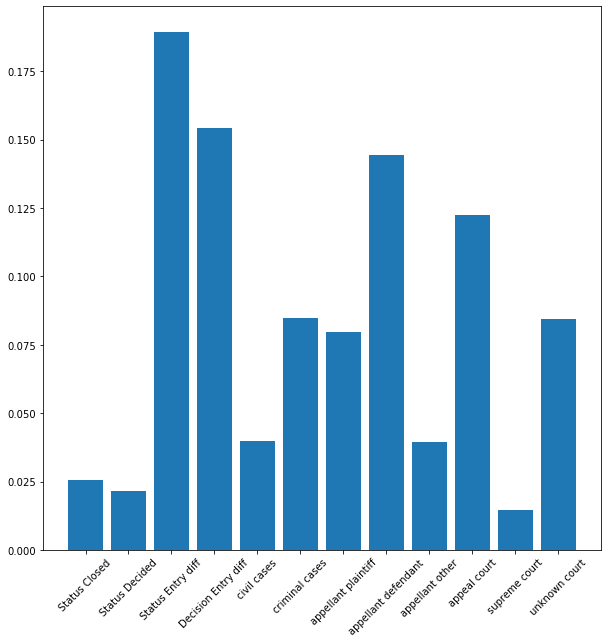

In [22]:
columns = df.columns.values
index = np.argwhere(columns=='prediction class')
columns = np.delete(columns, index)

plt.figure(figsize=(10,10))
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)
plt.xticks(range(len(clf.feature_importances_)),columns,rotation=45)
plt.show()